In [69]:
print('The questions to be answered are:')
print('What is the most highly rated movie genre in each year?')
print('Which movie genre is the most profitable on average by year?')
print('How much did the average budget of the genres movies appear to influence the ratings of the movies?')

The questions to be answered are:
What is the most highly rated movie genre in each year?
Which movie genre is the most profitable on average by year?
How much did the average budget of the genres movies appear to influence the ratings of the movies?


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

In [8]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df.shape

(10866, 21)

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

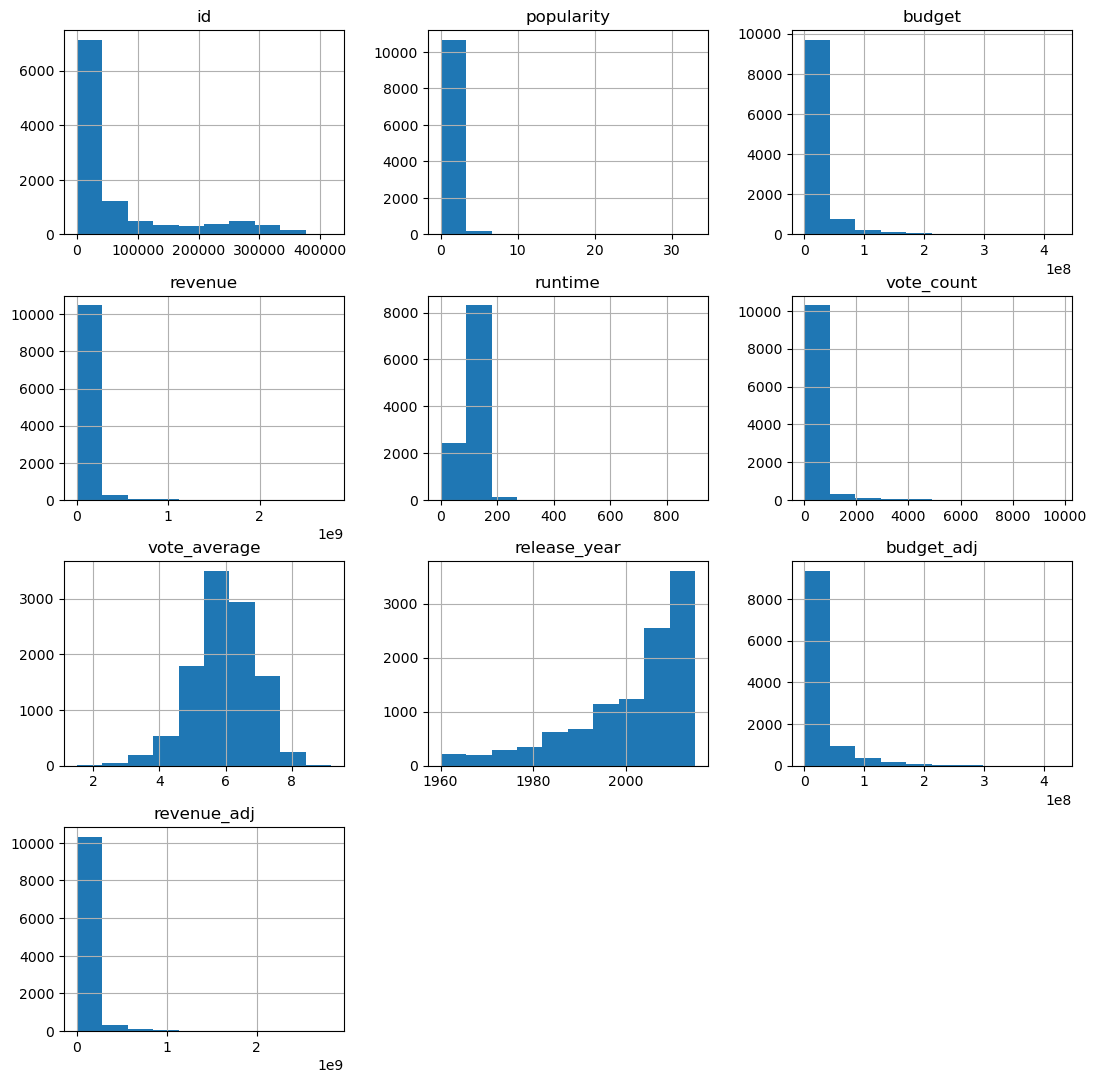

In [14]:
df.hist(figsize = (13, 13));

In [15]:
df.drop(['id', 'imdb_id', 'popularity', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'vote_count'], axis = 1, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        10865 non-null  int64  
 1   revenue       10865 non-null  int64  
 2   genres        10842 non-null  object 
 3   vote_average  10865 non-null  float64
 4   release_year  10865 non-null  int64  
 5   budget_adj    10865 non-null  float64
 6   revenue_adj   10865 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 679.1+ KB


In [17]:
df.dropna(axis = 0, inplace = True, subset = ['genres'])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        10842 non-null  int64  
 1   revenue       10842 non-null  int64  
 2   genres        10842 non-null  object 
 3   vote_average  10842 non-null  float64
 4   release_year  10842 non-null  int64  
 5   budget_adj    10842 non-null  float64
 6   revenue_adj   10842 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 677.6+ KB


In [75]:
print('What is the most popular movie genre for each year?')

What is the most popular movie genre for each year?


In [19]:
df.genres.nunique()

2039

In [20]:
genre_array = df.genres.values
genre_array = genre_array.astype('U')
print(genre_array.dtype)

<U51


In [21]:
split_genre_array = np.core.defchararray.split(a = genre_array, sep = '|')

In [22]:
print(split_genre_array.dtype)
print(split_genre_array)

object
[list(['Action', 'Adventure', 'Science Fiction', 'Thriller'])
 list(['Action', 'Adventure', 'Science Fiction', 'Thriller'])
 list(['Adventure', 'Science Fiction', 'Thriller']) ...
 list(['Mystery', 'Comedy']) list(['Action', 'Comedy']) list(['Horror'])]


In [23]:
total_words = 0
max_length = 0

for index, row in enumerate(split_genre_array):
   for word in split_genre_array[index]:
       total_words += 1
       if len(word) > max_length:
           max_length = len(word)
        
print('total_words: ' + str(total_words))
print('max_length: ' + str(max_length))

total_words: 26955
max_length: 15


In [24]:
combined_genre_array = np.empty((1, total_words), dtype = ('U' + str(max_length)))
combined_genre_array.shape

(1, 26955)

In [25]:
count = 0

for index, row in enumerate(split_genre_array):
    row_list = ast.literal_eval(str(row))
    for word in row_list:
        combined_genre_array[0, count] = word
        count += 1

In [26]:
print(combined_genre_array)

[['Action' 'Adventure' 'Science Fiction' ... 'Action' 'Comedy' 'Horror']]


In [27]:
genre_list = np.unique(combined_genre_array)
print(genre_list)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


In [28]:
action_df = df.loc[df.genres.str.contains('Action')]
adventure_df = df.loc[df.genres.str.contains('Adventure')]
animation_df = df.loc[df.genres.str.contains('Animation')]
comedy_df = df.loc[df.genres.str.contains('Comedy')]
crime_df = df.loc[df.genres.str.contains('Crime')]
documentary_df = df.loc[df.genres.str.contains('Documentary')]
drama_df = df.loc[df.genres.str.contains('Drama')]
family_df = df.loc[df.genres.str.contains('Family')]
fantasy_df = df.loc[df.genres.str.contains('Fantasy')]
foreign_df = df.loc[df.genres.str.contains('Foreign')]
history_df = df.loc[df.genres.str.contains('History')]
horror_df = df.loc[df.genres.str.contains('Horror')]
music_df = df.loc[df.genres.str.contains('Music')]
mystery_df = df.loc[df.genres.str.contains('Mystery')]
romance_df = df.loc[df.genres.str.contains('Romance')]
science_fiction_df = df.loc[df.genres.str.contains('Science Fiction')]
tv_movie_df = df.loc[df.genres.str.contains('TV Movie')]
thriller_df = df.loc[df.genres.str.contains('Thriller')]
war_df = df.loc[df.genres.str.contains('War')]
western_df = df.loc[df.genres.str.contains('Western')]

In [29]:
genre_count = []
for genre in genre_list:
    temp = genre.lower() + "_df"
    temp = temp.replace(" ", "_")
    number = len(eval(temp + '.index'))
    
    genre_count.append([temp[:-3], number])
    
genre_count.sort(key = lambda x:x[1], reverse = True)

for index, genre in enumerate(genre_count):
    genre_count[index] = [genre[0].title().replace("_", " "), genre[1]]

print(genre_count)

[['Drama', 4760], ['Comedy', 3793], ['Thriller', 2907], ['Action', 2384], ['Romance', 1712], ['Horror', 1637], ['Adventure', 1471], ['Crime', 1354], ['Family', 1231], ['Science Fiction', 1229], ['Fantasy', 916], ['Mystery', 810], ['Animation', 699], ['Documentary', 520], ['Music', 408], ['History', 334], ['War', 270], ['Foreign', 188], ['Tv Movie', 167], ['Western', 165]]


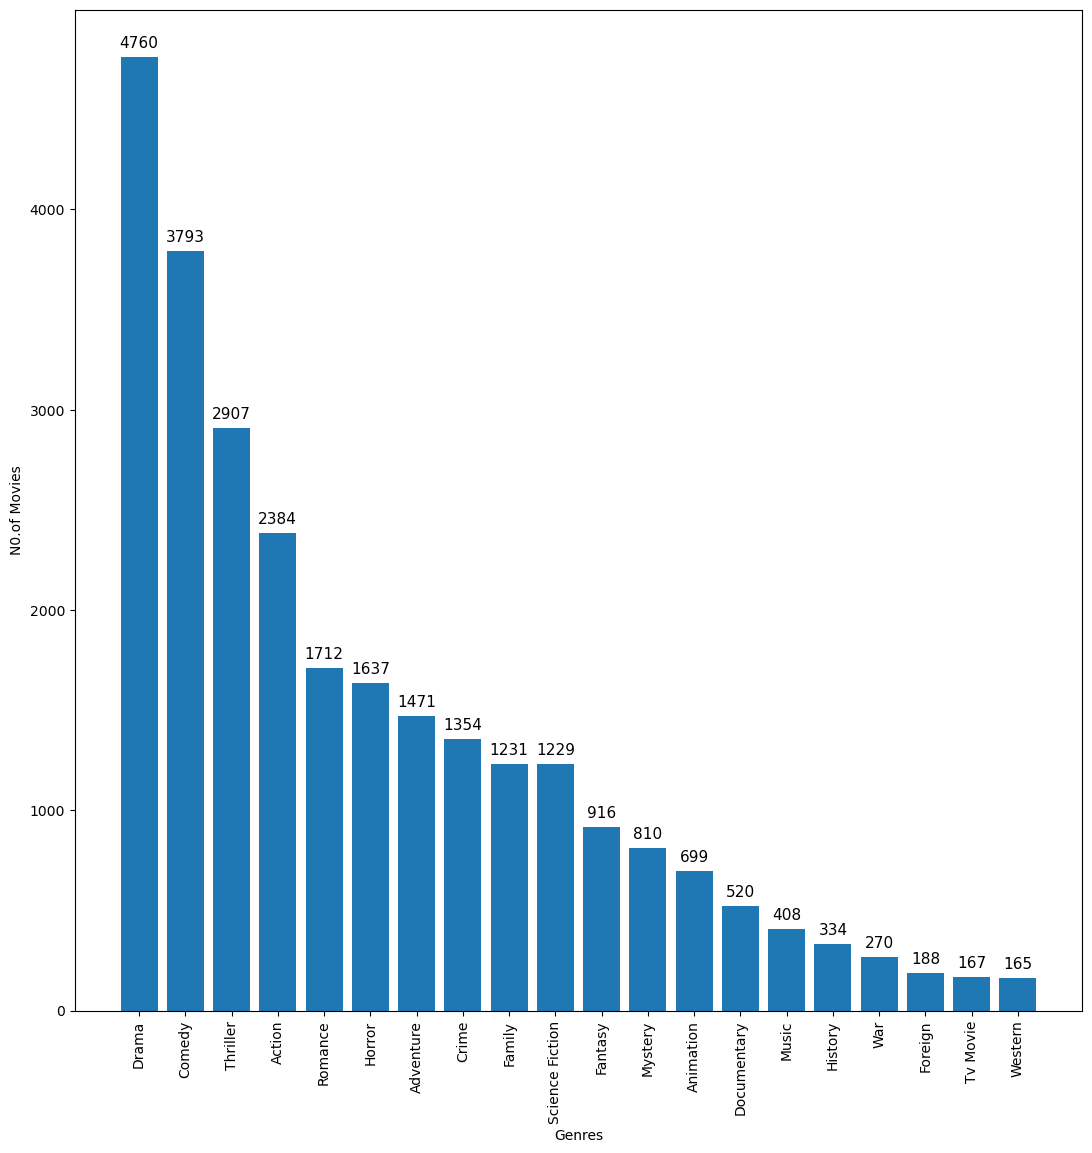

In [30]:
plt.figure(figsize=(13, 13))
x, y = [*zip(*genre_count)]
graph = plt.bar(x, y)
plt.xticks(rotation = 'vertical')
plt.xlabel('Genres')
plt.ylabel('N0.of Movies')

for p in graph.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 11, xytext = (0, 10), textcoords = 'offset points')

plt.show()

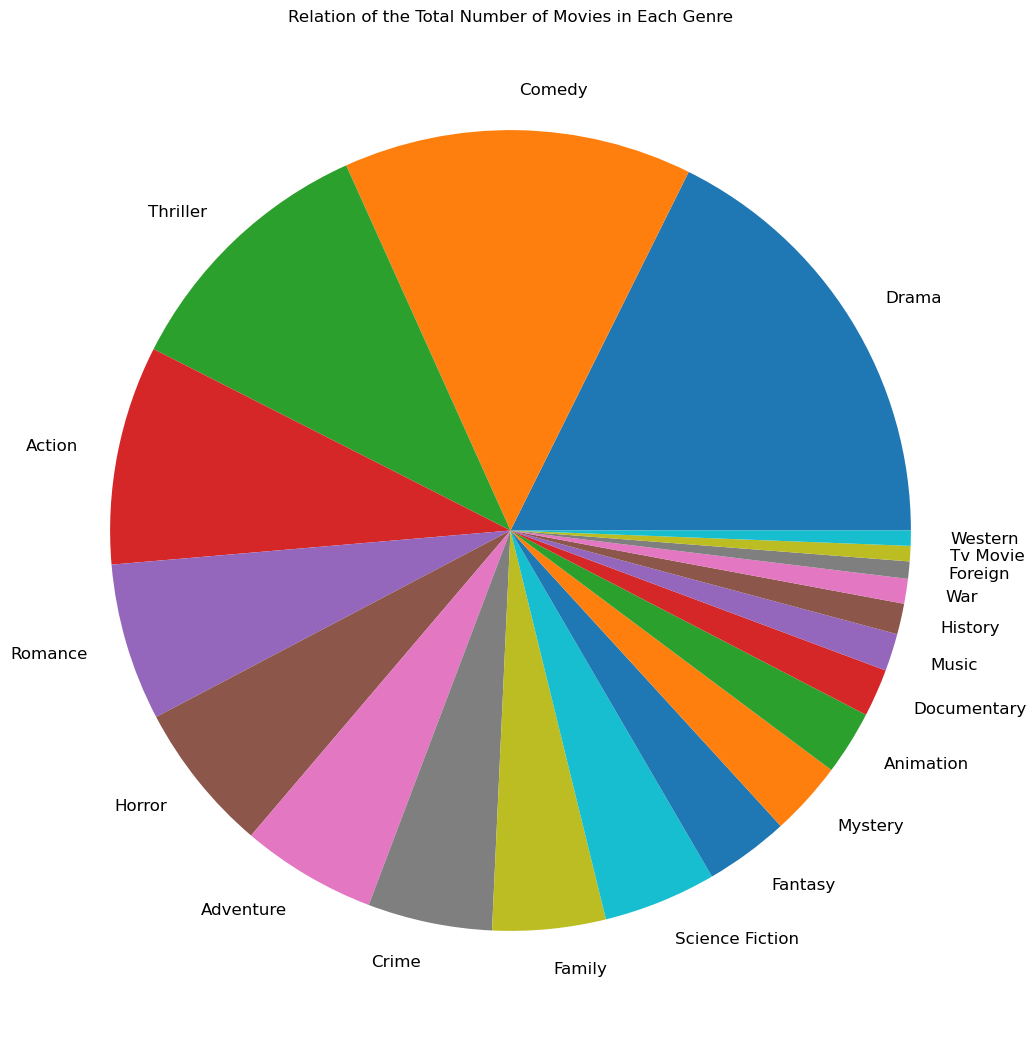

In [59]:
genre, amount = [*zip(*genre_count)]
plt.figure(figsize = (13, 13))
plt.title('Relation of the Total Number of Movies in Each Genre')
plt.pie(amount, labels = genre, textprops = {'fontsize': 12})

plt.show()

In [61]:
print('From these charts, it is easy to see which genres have the most movies. The top three genres are Drama, Comedy, and Thriller.')

From these charts, it is easy to see which genres have the most movies. The top three genres are Drama, Comedy, and Thriller.


In [32]:
years = df['release_year'].unique()
years.sort()
print(years)

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


In [62]:
print('There are 56 years, from 1960–2015, in this dataset.')

There are 56 years, from 1960–2015, in this dataset.


In [33]:
result_rows = ['vote_average_mean', 'budget_adj_mean', 'revenue_adj_mean', 'profit_adj_mean']
for year in years:
    result_rows.append(str(year) + '_vote_average')
    result_rows.append(str(year) + '_budget_adj')
    result_rows.append(str(year) + '_revenue_adj')
    result_rows.append(str(year) + '_profit_adj')
results_df = pd.DataFrame(index = result_rows, columns = genre_list)

In [34]:
for genre in genre_list:
    genre_df = genre.lower().replace(' ', '_') + '_df'
    results_df.at['vote_average_mean', str(genre)] = eval(genre_df)['vote_average'].mean()
    results_df.at['budget_adj_mean', str(genre)] = eval(genre_df)['budget_adj'].mean()
    results_df.at['revenue_adj_mean', str(genre)] = eval(genre_df)['revenue_adj'].mean()
    results_df.at['profit_adj_mean', str(genre)] = (eval(genre_df)['revenue_adj'].mean() - eval(genre_df)['budget_adj'].mean())

    for year in years:
        temp_year_df = eval(genre_df).loc[eval(genre_df)['release_year'] == year]
        results_df.at[str(year) + '_vote_average', str(genre)] = temp_year_df['vote_average'].mean()
        results_df.at[str(year) + '_budget_adj', str(genre)] = temp_year_df['budget_adj'].mean()
        results_df.at[str(year) + '_revenue_adj', str(genre)] = temp_year_df['revenue_adj'].mean()
        results_df.at[str(year) + '_profit_adj', str(genre)] = (temp_year_df['revenue_adj'].mean() - temp_year_df['budget_adj'].mean())    

In [35]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, vote_average_mean to 2015_profit_adj
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Action           228 non-null    object
 1   Adventure        228 non-null    object
 2   Animation        212 non-null    object
 3   Comedy           228 non-null    object
 4   Crime            228 non-null    object
 5   Documentary      172 non-null    object
 6   Drama            228 non-null    object
 7   Family           228 non-null    object
 8   Fantasy          220 non-null    object
 9   Foreign          156 non-null    object
 10  History          220 non-null    object
 11  Horror           228 non-null    object
 12  Music            216 non-null    object
 13  Mystery          224 non-null    object
 14  Romance          228 non-null    object
 15  Science Fiction  228 non-null    object
 16  TV Movie         156 non-null    object
 17  Thriller    

In [36]:
results_df = results_df.apply(pd.to_numeric, axis = 1, errors = 'coerce')

In [37]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, vote_average_mean to 2015_profit_adj
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Action           228 non-null    float64
 1   Adventure        228 non-null    float64
 2   Animation        212 non-null    float64
 3   Comedy           228 non-null    float64
 4   Crime            228 non-null    float64
 5   Documentary      172 non-null    float64
 6   Drama            228 non-null    float64
 7   Family           228 non-null    float64
 8   Fantasy          220 non-null    float64
 9   Foreign          156 non-null    float64
 10  History          220 non-null    float64
 11  Horror           228 non-null    float64
 12  Music            216 non-null    float64
 13  Mystery          224 non-null    float64
 14  Romance          228 non-null    float64
 15  Science Fiction  228 non-null    float64
 16  TV Movie         156 non-null    float6

In [38]:
results_df

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
vote_average_mean,5.787752e+00,5.940585e+00,6.403147e+00,5.905167e+00,6.124889e+00,6.908462e+00,6.165546e+00,5.997563e+00,5.863537e+00,5.981383e+00,6.410479e+00,5.337447e+00,6.480392e+00,5.946790e+00,6.042874e+00,5.665582e+00,5.788024,5.750671e+00,6.297778e+00,6.083030e+00
budget_adj_mean,3.296011e+07,4.393734e+07,2.529535e+07,1.592031e+07,2.153351e+07,6.232226e+05,1.485353e+07,2.692389e+07,3.742932e+07,2.379151e+06,2.655802e+07,7.764841e+06,1.298886e+07,1.948231e+07,1.565922e+07,2.952429e+07,296021.519438,2.068296e+07,2.893007e+07,2.449744e+07
revenue_adj_mean,9.175827e+07,1.416752e+08,8.525613e+07,4.789700e+07,5.663641e+07,2.258210e+06,4.041714e+07,8.773671e+07,1.112342e+08,1.784286e+06,4.794858e+07,2.408271e+07,4.665592e+07,5.088930e+07,4.820022e+07,8.697842e+07,349635.347523,5.528610e+07,6.998611e+07,4.610126e+07
profit_adj_mean,5.879816e+07,9.773789e+07,5.996078e+07,3.197669e+07,3.510290e+07,1.634988e+06,2.556360e+07,6.081282e+07,7.380484e+07,-5.948650e+05,2.139056e+07,1.631787e+07,3.366706e+07,3.140699e+07,3.254100e+07,5.745413e+07,53613.828085,3.460314e+07,4.105605e+07,2.160382e+07
1960_vote_average,6.050000e+00,6.680000e+00,NaN,6.312500e+00,5.900000e+00,NaN,6.276923e+00,7.033333e+00,6.650000e+00,4.900000e+00,6.180000e+00,6.642857e+00,6.600000e+00,NaN,6.350000e+00,6.766667e+00,NaN,6.816667e+00,5.500000e+00,5.950000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014_profit_adj,6.442447e+07,1.108748e+08,5.923856e+07,2.454596e+07,5.437214e+06,1.207010e+04,1.261628e+07,5.185299e+07,1.040524e+08,NaN,2.028777e+07,5.676366e+06,1.167274e+07,2.016965e+07,1.383936e+07,7.936568e+07,0.000000,1.854078e+07,5.582573e+07,-2.083203e+06
2015_vote_average,5.629907e+00,6.075362e+00,6.492308e+00,6.019136e+00,5.915686e+00,7.007018e+00,6.078846e+00,6.379545e+00,5.915152e+00,NaN,6.513333e+00,5.008800e+00,6.442424e+00,5.642857e+00,6.092982e+00,5.682558e+00,6.100000,5.471345e+00,6.222222e+00,6.316667e+00
2015_budget_adj,3.047847e+07,4.848398e+07,2.114820e+07,1.260273e+07,2.512320e+07,2.663157e+04,7.617659e+06,2.750590e+07,3.344422e+07,NaN,1.274506e+07,2.168255e+06,3.964362e+06,1.188333e+07,6.946804e+06,2.622459e+07,137999.939280,1.142763e+07,2.187555e+07,3.860932e+07
2015_revenue_adj,1.136456e+08,1.816888e+08,9.814404e+07,4.361023e+07,8.150678e+07,5.152083e+05,2.262774e+07,1.066024e+08,1.130950e+08,NaN,1.660334e+07,7.131260e+06,1.964576e+07,2.114214e+07,2.759893e+07,1.028802e+08,0.000000,4.166720e+07,7.217865e+07,1.056374e+08


In [63]:
print('We can now use these results to find out which genre was the most popular in each year by the mean vote_average.')

We can now use these results to find out which genre was the most popular in each year by the mean vote_average.


In [39]:
results_max = results_df.idxmax(axis = 1)

In [40]:
vote_average_max = results_max[0::4]
budget_average_max = results_max[1::4]
revenue_average_max = results_max[2::4]
profit_average_max = results_max[3::4]
print(vote_average_max)

vote_average_mean    Documentary
1960_vote_average         Family
1961_vote_average        Mystery
1962_vote_average        Western
1963_vote_average            War
1964_vote_average            War
1965_vote_average      Animation
1966_vote_average      Animation
1967_vote_average            War
1968_vote_average        Mystery
1969_vote_average          Crime
1970_vote_average      Animation
1971_vote_average         Family
1972_vote_average    Documentary
1973_vote_average         Comedy
1974_vote_average          Music
1975_vote_average    Documentary
1976_vote_average    Documentary
1977_vote_average    Documentary
1978_vote_average        Foreign
1979_vote_average          Music
1980_vote_average       TV Movie
1981_vote_average          Music
1982_vote_average      Animation
1983_vote_average        History
1984_vote_average    Documentary
1985_vote_average    Documentary
1986_vote_average      Animation
1987_vote_average        History
1988_vote_average    Documentary
1989_vote_

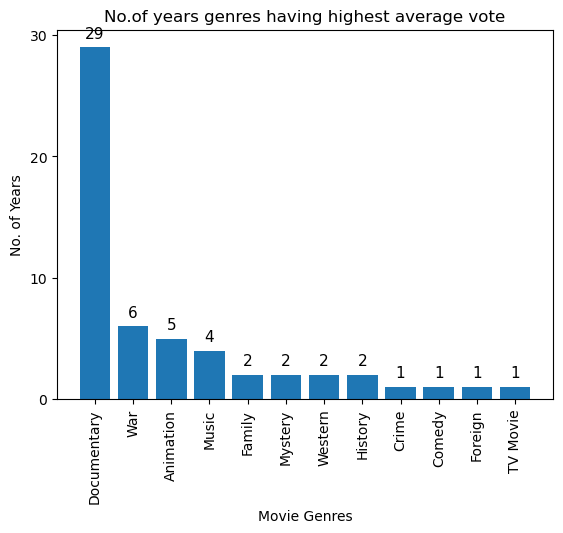

In [57]:
vote_x = vote_average_max[1:].value_counts().index.values.tolist()
vote_y = vote_average_max[1:].value_counts().tolist()
def bar_plot(arg1,arg2,arg3):
    graph = plt.bar(arg1,arg2)
    plt.title(arg3)
    plt.xticks(rotation = 'vertical')
    plt.yticks([0, 10, 20, 30])
    plt.xlabel('Movie Genres')
    plt.ylabel('No. of Years')
    for p in graph.patches:
        plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 11, xytext = (0, 10), textcoords = 'offset points')
plt.show()
bar_plot(vote_x,vote_y,'No.of years genres having highest average vote')

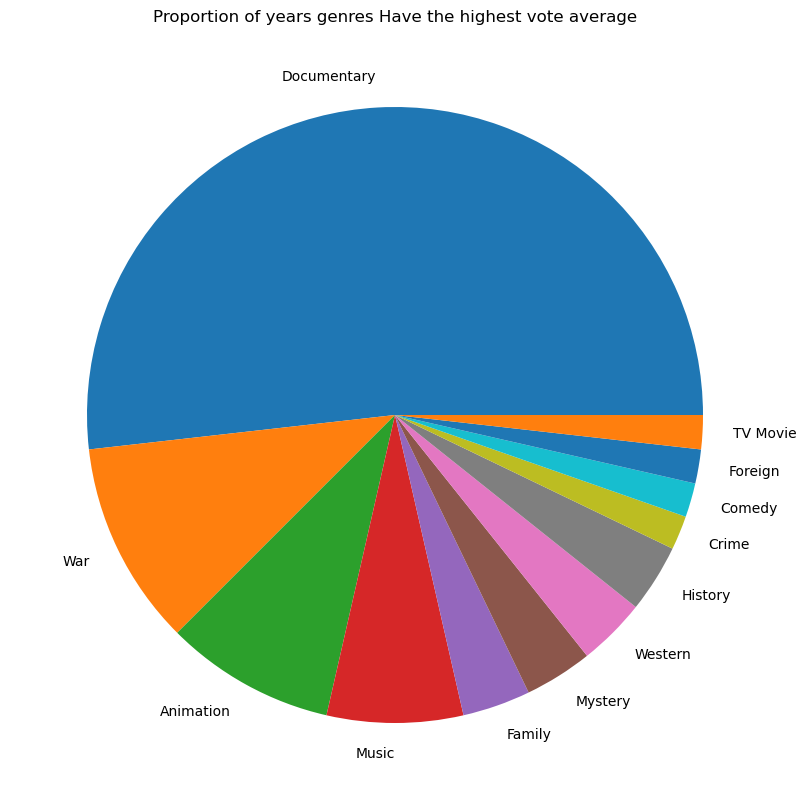

In [42]:
plt.figure(figsize = (10, 10))
plt.title('Proportion of years genres Have the highest vote average')
plt.pie(vote_y, labels = vote_x, textprops = {'fontsize': 10})
plt.show()

In [65]:
print('The Documentary genre is the most highly rated movie genre on average')

The Documentary genre is the most highly rated movie genre on average


In [43]:
print(budget_average_max)

budget_adj_mean    Adventure
1960_budget_adj      History
1961_budget_adj    Animation
1962_budget_adj          War
1963_budget_adj      History
1964_budget_adj       Family
1965_budget_adj      History
1966_budget_adj          War
1967_budget_adj          War
1968_budget_adj    Adventure
1969_budget_adj      History
1970_budget_adj      Foreign
1971_budget_adj    Animation
1972_budget_adj      Fantasy
1973_budget_adj    Animation
1974_budget_adj       Action
1975_budget_adj      Romance
1976_budget_adj       Family
1977_budget_adj          War
1978_budget_adj      Fantasy
1979_budget_adj       Action
1980_budget_adj        Music
1981_budget_adj          War
1982_budget_adj      History
1983_budget_adj      History
1984_budget_adj    Adventure
1985_budget_adj          War
1986_budget_adj      Western
1987_budget_adj      History
1988_budget_adj      Foreign
1989_budget_adj    Adventure
1990_budget_adj    Adventure
1991_budget_adj      History
1992_budget_adj      History
1993_budget_ad

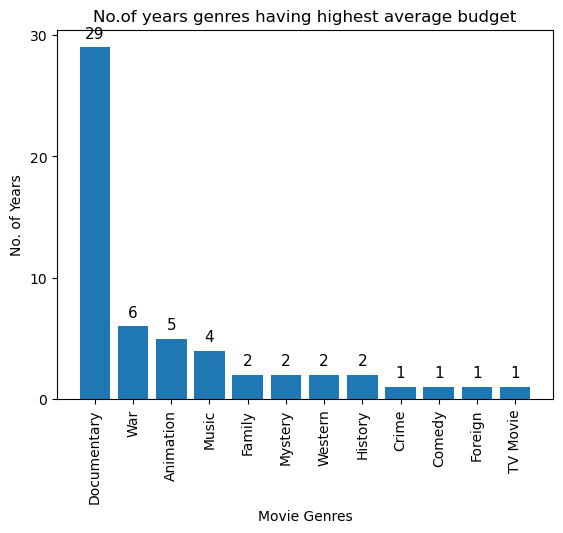

In [58]:
budget_x = budget_average_max[1:].value_counts().index.values.tolist()
budget_y = budget_average_max[1:].value_counts().tolist()

bar_plot(vote_x,vote_y,'No.of years genres having highest average budget')


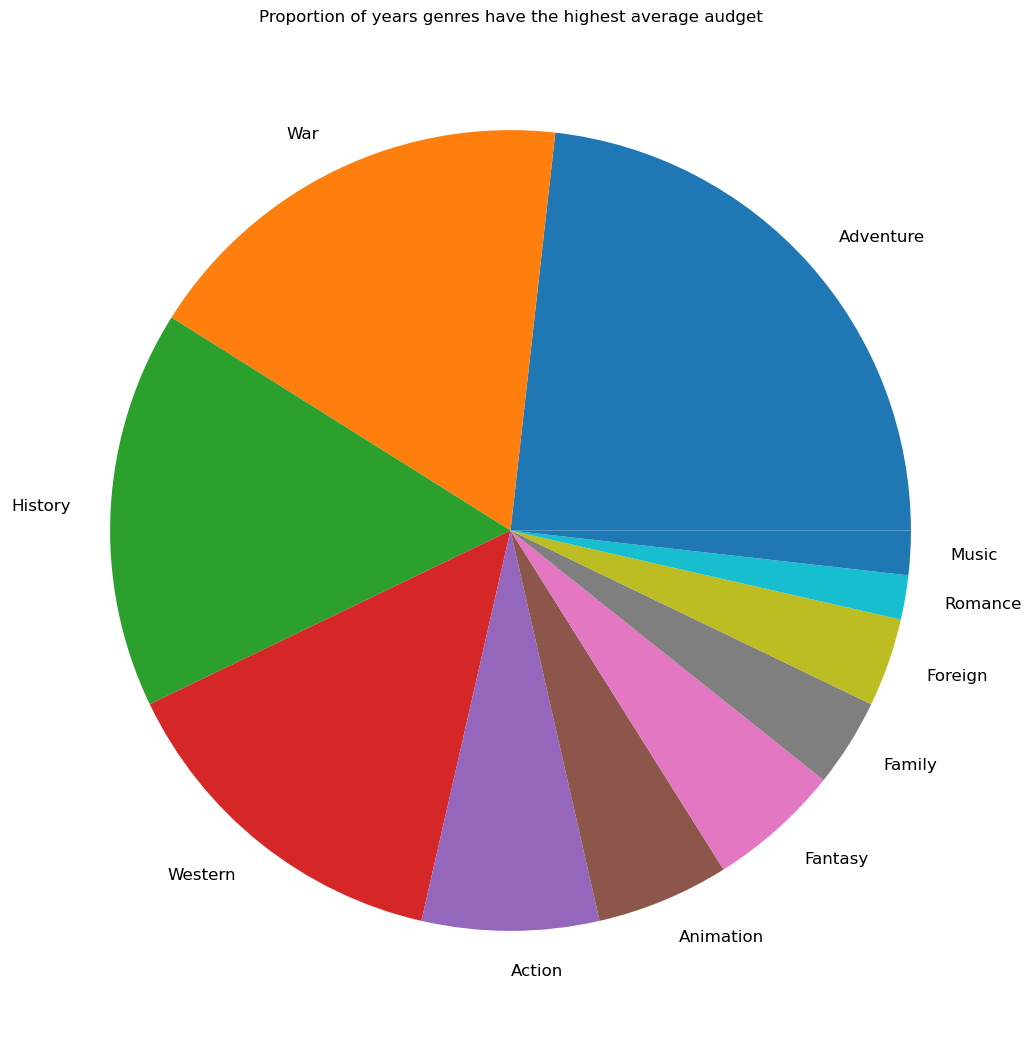

In [45]:
plt.figure(figsize = (13, 13))
plt.title('Proportion of years genres have the highest average audget')
plt.pie(budget_y, labels = budget_x, textprops = {'fontsize': 12})
plt.show()

In [64]:
print('the Adventure genre has the highest budgets and revenues according to this dataset')

the Adventure genre has the highest budgets and revenues according to this dataset


In [72]:
print('What is the most profitable movie genre for each year?')
print('Lets see which movie genres are the most profitible per year on average and then visualize the overarching information.')

What is the most profitable movie genre for each year?
Lets see which movie genres are the most profitible per year on average and then visualize the overarching information.


In [46]:
print(revenue_average_max)

revenue_adj_mean          Adventure
1960_revenue_adj            History
1961_revenue_adj          Animation
1962_revenue_adj          Adventure
1963_revenue_adj             Action
1964_revenue_adj             Family
1965_revenue_adj              Music
1966_revenue_adj                War
1967_revenue_adj          Animation
1968_revenue_adj            Mystery
1969_revenue_adj              Crime
1970_revenue_adj                War
1971_revenue_adj             Action
1972_revenue_adj              Crime
1973_revenue_adj           Thriller
1974_revenue_adj            Western
1975_revenue_adj             Horror
1976_revenue_adj              Music
1977_revenue_adj    Science Fiction
1978_revenue_adj              Music
1979_revenue_adj          Adventure
1980_revenue_adj    Science Fiction
1981_revenue_adj          Adventure
1982_revenue_adj          Adventure
1983_revenue_adj          Adventure
1984_revenue_adj             Action
1985_revenue_adj                War
1986_revenue_adj          Ad

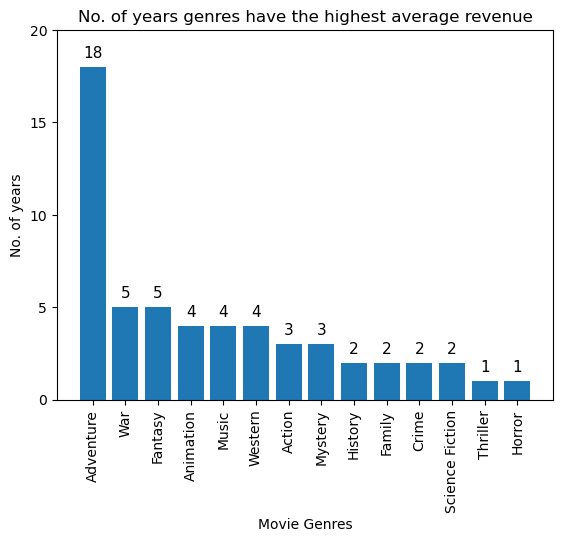

In [47]:
revenue_x = revenue_average_max[1:].value_counts().index.values.tolist()
revenue_y = revenue_average_max[1:].value_counts().tolist()
graph = plt.bar(revenue_x, revenue_y)
plt.title('No. of years genres have the highest average revenue')
plt.xticks(rotation = 'vertical')
plt.yticks([0, 5, 10, 15, 20])
plt.xlabel('Movie Genres')
plt.ylabel('No. of years')
for p in graph.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 11, xytext = (0, 10), textcoords = 'offset points')
plt.show()

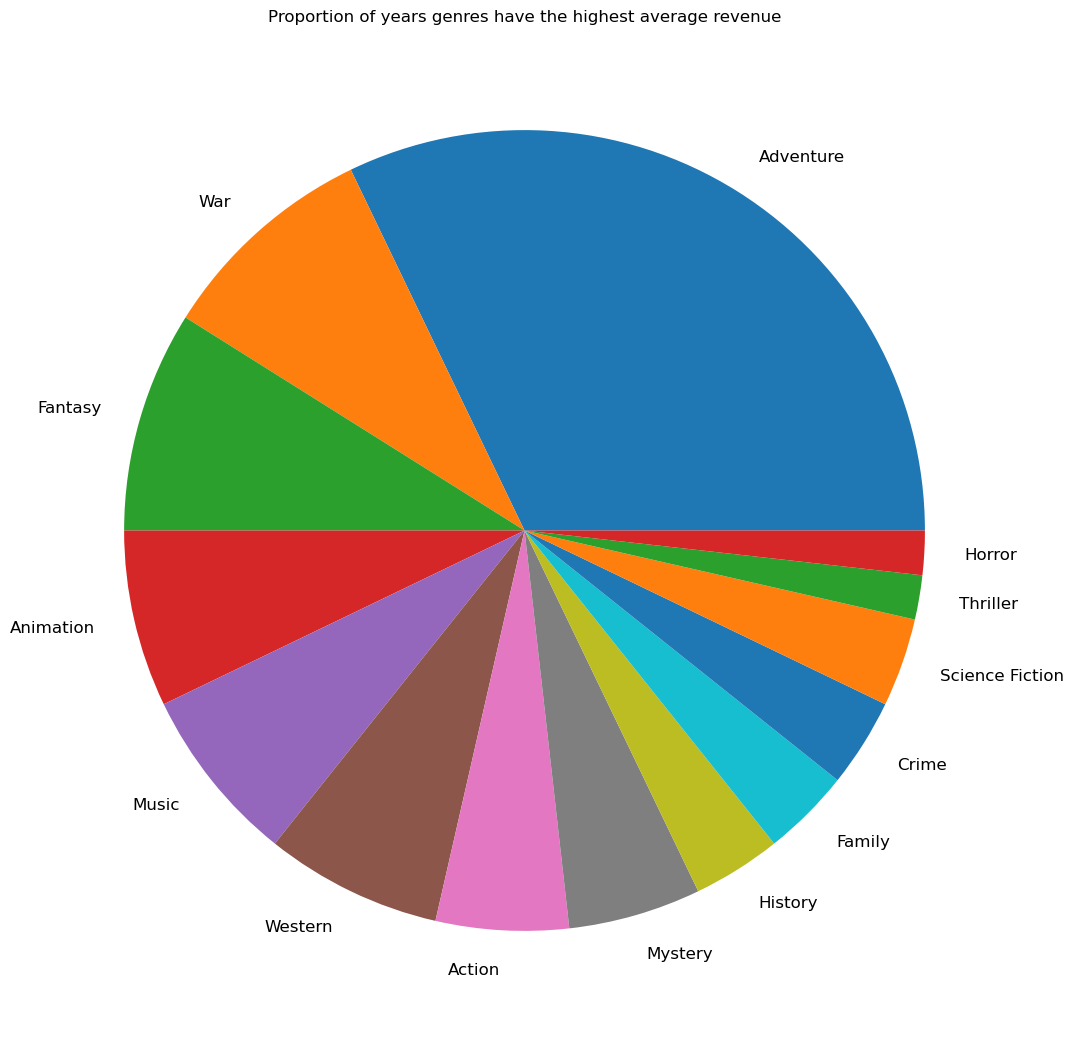

In [48]:
plt.figure(figsize = (13, 13))
plt.title('Proportion of years genres have the highest average revenue')
plt.pie(revenue_y, labels = revenue_x, textprops = {'fontsize':12})
plt.show()

In [73]:
print('Is a higher movie budget associated with a higher average vote?')

Is a higher movie budget associated with a higher average vote?


In [49]:
print(profit_average_max)

profit_adj_mean          Adventure
1960_profit_adj            History
1961_profit_adj          Animation
1962_profit_adj          Adventure
1963_profit_adj             Action
1964_profit_adj             Family
1965_profit_adj              Music
1966_profit_adj                War
1967_profit_adj          Animation
1968_profit_adj            Mystery
1969_profit_adj              Crime
1970_profit_adj                War
1971_profit_adj             Action
1972_profit_adj              Crime
1973_profit_adj           Thriller
1974_profit_adj            Western
1975_profit_adj             Horror
1976_profit_adj              Music
1977_profit_adj    Science Fiction
1978_profit_adj              Music
1979_profit_adj          Adventure
1980_profit_adj    Science Fiction
1981_profit_adj          Adventure
1982_profit_adj          Adventure
1983_profit_adj          Adventure
1984_profit_adj             Action
1985_profit_adj                War
1986_profit_adj                War
1987_profit_adj     

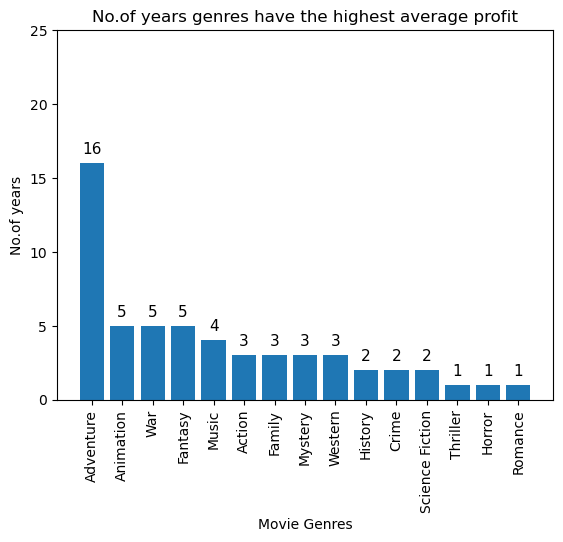

In [50]:
profit_x = profit_average_max[1:].value_counts().index.values.tolist()
profit_y = profit_average_max[1:].value_counts().tolist()
graph = plt.bar(profit_x, profit_y)
plt.title('No.of years genres have the highest average profit')
plt.xticks(rotation = 'vertical')
plt.yticks([0, 5, 10, 15, 20, 25])
plt.xlabel('Movie Genres')
plt.ylabel('No.of years')
for p in graph.patches:
    plt.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', fontsize = 11, xytext = (0, 10), textcoords = 'offset points')
plt.show()

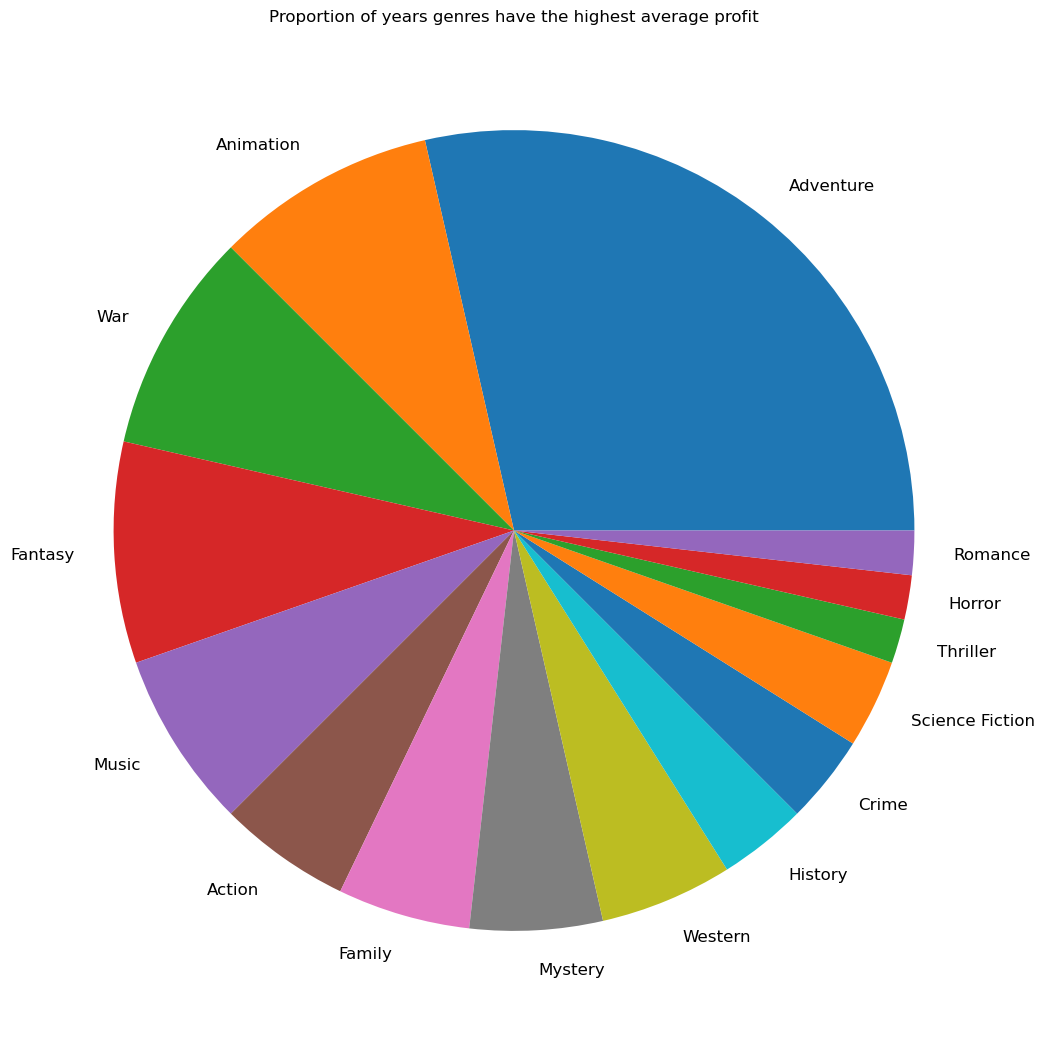

In [51]:
plt.figure(figsize = (13, 13))
plt.title('Proportion of years genres have the highest average profit')
plt.pie(profit_y, labels = profit_x, textprops = {'fontsize': 12})

plt.show()

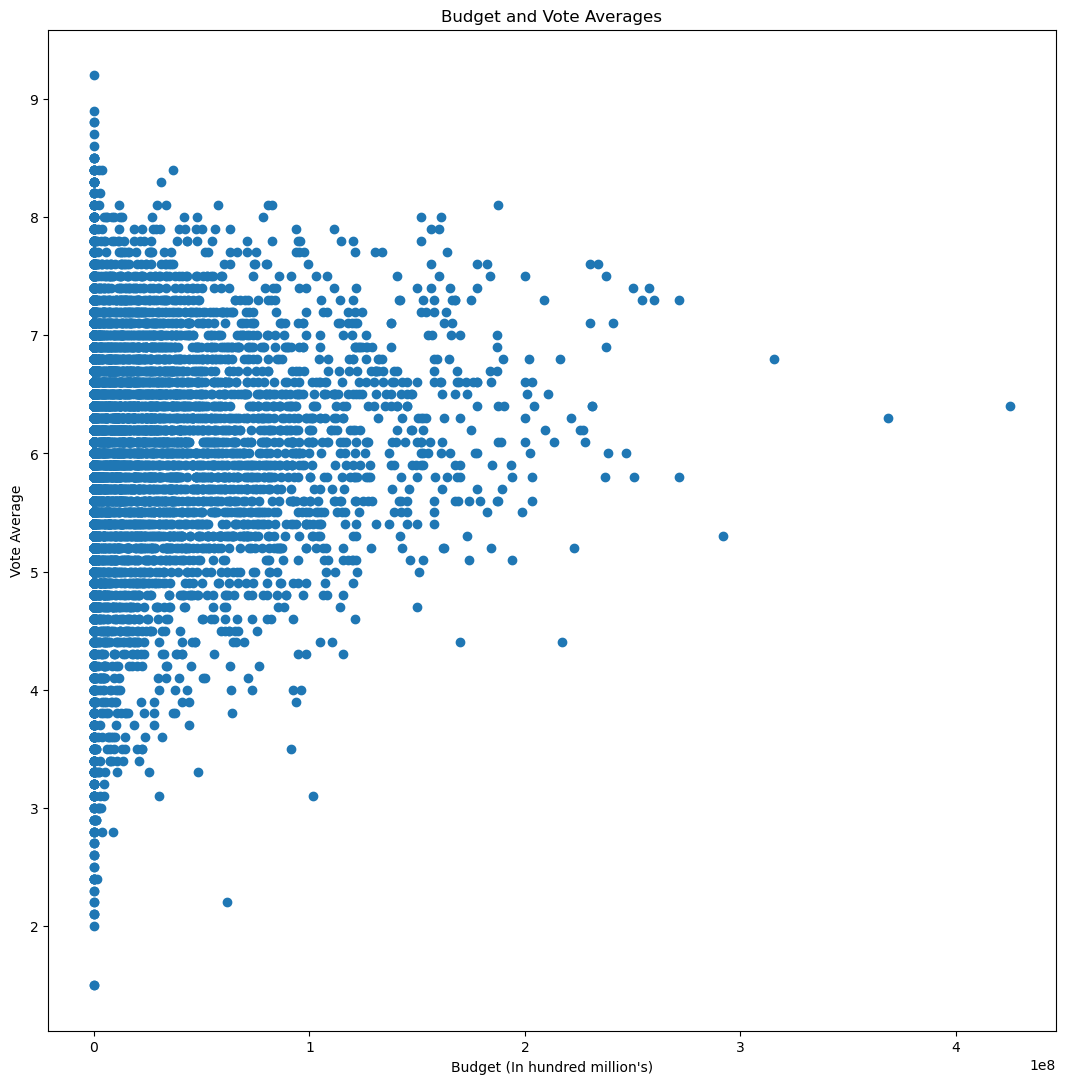

In [52]:
plt.figure(figsize = (13, 13))
plt.title('Budget and Vote Averages')
plt.xlabel("Budget (In hundred million's)")
plt.ylabel('Vote Average')
graph = plt.scatter(df['budget_adj'], df['vote_average'])

plt.show()

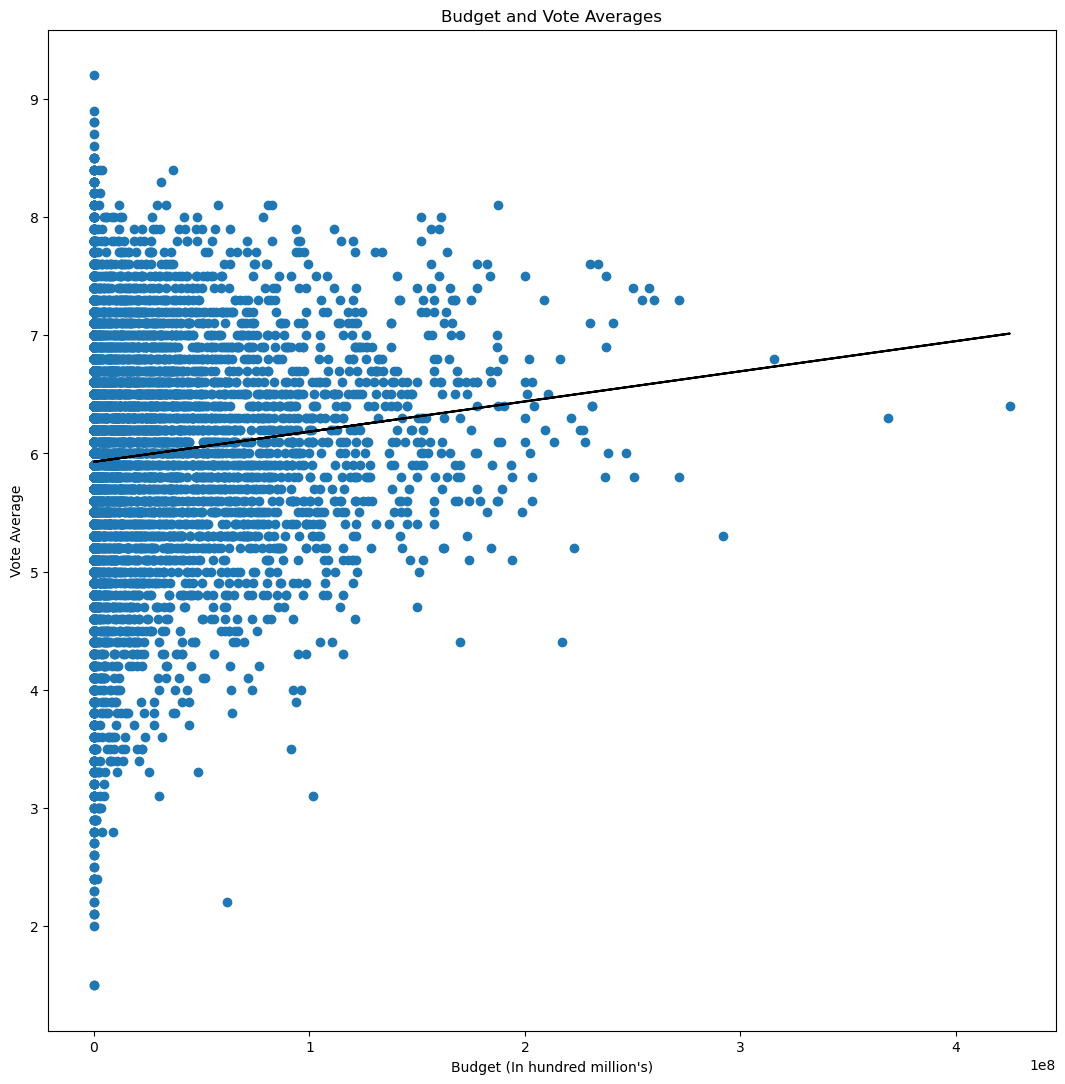

In [53]:
plt.figure(figsize = (13, 13))
plt.title('Budget and Vote Averages')
plt.xlabel("Budget (In hundred million's)")
plt.ylabel('Vote Average')
graph = plt.scatter(df['budget_adj'], df['vote_average'])
plt.plot(df['budget_adj'], np.poly1d(np.polyfit(df['budget_adj'], df['vote_average'], 1))(df['budget_adj']), color = 'black')
plt.show()

In [67]:
print('From this scatter plot and line of best fit, we can see that a higher budget does have a slight correlation with a higher vote_average, but the absolute highest rated movies have lower budgets')

From this scatter plot and line of best fit, we can see that a higher budget does have a slight correlation with a higher vote_average, but the absolute highest rated movies have lower budgets


In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1